# Expectation Maximization: K-Means
### Lehner White

In [1]:
import random
import seaborn
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt

/Users/Lehner/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
class Kmeans():
    """
    A class that uses the kmeans algorithm to cluster data and classify it dpeending on the nearest
    cluster mean.
    """
    def __init__(self):
        pass
    
    def train(self, data, k=3):
        """
        A function that accepts the input data and the number of clusters desired applies the kmeans
        algorithm and returns the means of each cluster.
        """
        #initilaize variables
        self.X = data
        self.d = data.shape[1]
        self.n = data.shape[0]
        self.k = k
        
        #initialize centers
        self.mu = np.random.randn(self.k, self.d) + np.mean(self.X, axis=0)

        #initialize our normed difference to starty the while loop
        diff = np.inf
        
        #iterate through the data creating clusters everytime until the means have converged
        while (diff > 10e-5):
            old_mu = self.mu.copy()
            
            #calculate the distance from each mean and identify the closest one as the correct label
            dist = [np.linalg.norm(data - center, axis=1) for center in self.mu]
            self.cats = np.argmin(dist, axis = 0)
            
            #seperate the data into clusters
            clusters = [data[np.where(self.cats==i)] for i in xrange(self.k)]
            self.mu = np.array([np.mean(cluster, axis=0) for cluster in clusters])
            
            #calculate the new normed difference
            diff = np.linalg.norm(old_mu - self.mu)
        
        return self.mu

In [3]:
test_data = datasets.make_blobs(n_samples=500, random_state=7)[0]

We are going to test the k-means algorithm on multiple numbers of clusters, both correct and incorrect.

[[-4.85508291  4.93300577]
 [ 9.61912052  0.74366381]]


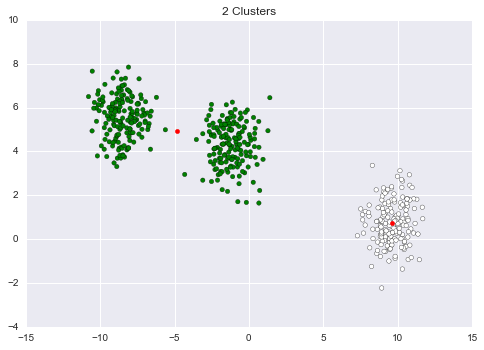

[[-1.20408271  4.32181805]
 [-8.5060831   5.54419349]
 [ 9.61912052  0.74366381]]


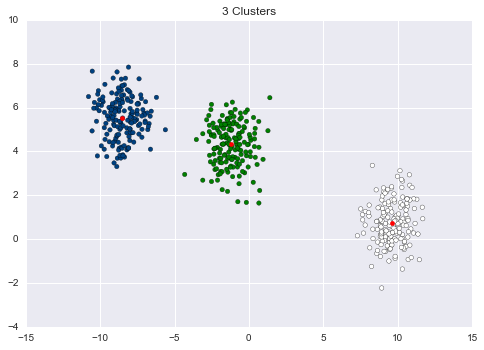

[[-8.5060831   5.54419349]
 [ 9.61912052  0.74366381]
 [-1.24712413  3.38201009]
 [-1.17224999  5.01688436]]


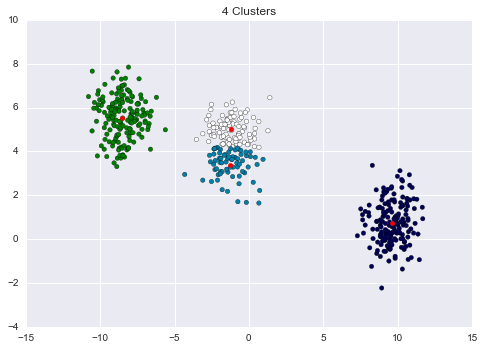

In [4]:
for i in xrange(2,5):
    model = Kmeans()
    print model.train(test_data, k=i)
    plt.scatter(test_data[:,0], test_data[:,1], c=model.cats, cmap='ocean')
    plt.scatter(model.mu[:,0], model.mu[:,1], color='red')
    plt.title('{} Clusters'.format(i))
    plt.show()